In [1]:
import pandas as pd
import numpy as np
import glob
import os
import copy

## Functions

Define a few functions that help open and process the data

In [2]:
def readDir():
    """
    Returns a dataframe of the data files in the directory with the bikeshare data.
    """
    data = pd.DataFrame()
    
    path = os.path.join(os.sep, "raid", "public_data", "Bike_Share_Data", "Boston")
    
    for filename in glob.glob(os.path.join(path, '*.csv')):
        # Get the filesizes in megabytes
        f_size = os.path.getsize(filename) / 1_000_000
        
        # A dictionary stores information about the files to be be put in the df
        file = {"Filename": filename, "Size (mb)": f_size}
        data = data.append(file, ignore_index=True)
        
    return data

def openCSV(files, index):
    """
    Using filenames retrieved with readDir, use this function to open a specific
    csv. Returns a dataframe with the data requested.
    """
    data = pd.read_csv(files.loc[index, 'Filename'])
    if index != 0:
        data['starttime'] = pd.to_datetime(data['starttime'])
        data['stoptime'] = pd.to_datetime(data['stoptime'])
    return data

def combineDFs(files):
    """
    Makes a single dataframe that holds all the values for all the years.
    """
    data = []

    for i in range(files.index.values.shape[0]):
        data.append(openCSV(files, i))

    fulldf = pd.concat(data[1:], ignore_index=True)
    fulldf['birth year'] = fulldf['birth year'].astype(int, errors='ignore')
    
    return fulldf.sort_values(by='starttime').reset_index(drop=True)

## Clean and transform the dataset

We're focusing here on the age of bike riders. Let's get a new column of their age. This cell will take a second, as the dataset is around 5 million!

In [3]:
# Read in files and create dataframe
files = readDir()
data  = combineDFs(files)

# data.set_index('starttime', inplace=True)

# Drop all rows where birth year is NULL
data = data.dropna(subset=['birth year'])

# Drop all rows where birth year is '\N'
data = data[data['birth year']!='\\N']
data = data.reset_index(drop=True)

# Convert birth year column to an integer
data['birth year'] = data['birth year'].astype(int, errors='ignore')

# Create a column for year
data['year'] = data['starttime'].map(lambda x: x.year)

# Now create an age column
data['rider age'] = data['year'] - data['birth year']

In [4]:
# Drop riders whose age is > 80 (ASSUMPTION)
data = data[data['rider age'] <= 80]
data = data.reset_index(drop=True)

In [5]:
# Drop trip durations that are more than 1 hour -- or more than 3 standard deviations from the mean (ASSUMPTION)
data = data[data['tripduration'] < (1*60*60)] # Tripduration is given in seconds

In [6]:
# def ageCat(age):
#     """
#     Takes an age, returns a category:
#     1 - age < 20
#     2 - 20 <= age < 30
#     3 - 30 <= age < 40
#     4 - 40 <= age < 50
#     5 - 
#     """

# data['age group'] = data[]

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4741425 entries, 0 to 4816542
Data columns (total 17 columns):
tripduration               int64
starttime                  datetime64[ns]
stoptime                   datetime64[ns]
start station id           int64
start station name         object
start station latitude     float64
start station longitude    float64
end station id             object
end station name           object
end station latitude       object
end station longitude      object
bikeid                     int64
usertype                   object
birth year                 int64
gender                     int64
year                       int64
rider age                  int64
dtypes: datetime64[ns](2), float64(2), int64(7), object(6)
memory usage: 651.1+ MB


# Visualize the data

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

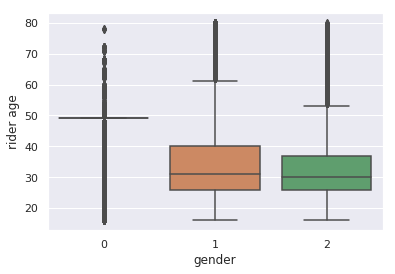

In [9]:
sns.set()

sns.boxplot(x='gender', y='rider age', data=data)

/opt/anaconda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


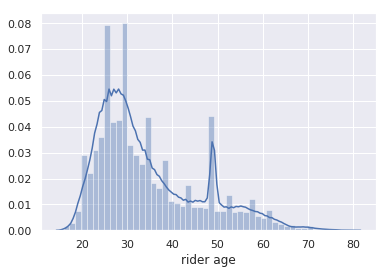

In [10]:
sns.distplot(data['rider age'])

In [11]:
data.describe()

,tripduration,start station id,start station latitude,start station longitude,bikeid,birth year,gender,year,rider age
count,4.741425e+06,4.741425e+06,4.741425e+06,4.741425e+06,4.741425e+06,4.741425e+06,4.741425e+06,4.741425e+06,4.741425e+06
mean,7.455294e+02,8.545558e+01,4.235781e+01,-7.108662e+01,1.455972e+03,1.982186e+03,1.199629e+00,2.016807e+03,3.462032e+01
std,5.161512e+02,5.940849e+01,9.838128e-02,1.651003e-01,1.079745e+03,1.142000e+01,4.927798e-01,1.152553e+00,1.137085e+01
min,6.100000e+01,1.000000e+00,0.000000e+00,-7.116649e+01,1.000000e+00,1.937000e+03,0.000000e+00,2.015000e+03,1.600000e+01
25%,3.770000e+02,4.100000e+01,4.234876e+01,-7.110441e+01,6.240000e+02,1.975000e+03,1.000000e+00,2.016000e+03,2.600000e+01
50%,6.070000e+02,7.400000e+01,4.235810e+01,-7.108822e+01,1.172000e+03,1.986000e+03,1.000000e+00,2.017000e+03,3.100000e+01
75%,9.710000e+02,1.150000e+02,4.236616e+01,-7.106629e+01,2.084000e+03,1.991000e+03,1.000000e+00,2.018000e+03,4.100000e+01
max,3.599000e+03,3.810000e+02,4.240630e+01,0.000000e+00,4.565000e+03,2.002000e+03,2.000000e+00,2.019000e+03,8.000000e+01


Text(0, 0.5, 'Minutes')

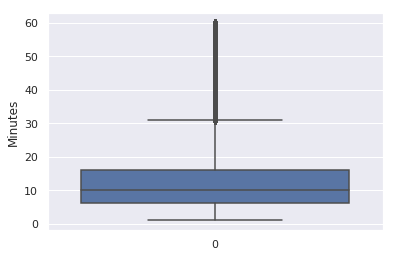

In [16]:
sns.boxplot(data=data['tripduration'] / 60)
# plt.yscale('log')
plt.ylabel("Minutes")

In [13]:
(8.226302e+02 + 3 * (8.942204e+02)) / 60

58.42152333333333